In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Stations = pd.read_csv('hubway_stations.csv')

In [2]:
Stations.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [3]:
Trips = pd.read_csv('hubway_trips.csv')

In [4]:
Trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [5]:
Trips.dtypes

seq_id          int64
hubway_id       int64
status         object
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
bike_nr        object
subsc_type     object
zip_code       object
birth_date    float64
gender         object
dtype: object

In [6]:
registered_members_duration = np.array(Trips['duration'].loc[Trips['subsc_type'] == 'Registered'])

In [7]:
registered_members_duration

array([  9, 220,  56, ..., 480, 120, 420], dtype=int64)

In [8]:
casual_members_duration = np.array(Trips['duration'].loc[Trips['subsc_type'] == 'Casual'])

In [9]:
casual_members_duration

array([ 994, 2121, 1315, ...,  780,  300,  540], dtype=int64)

In [10]:
np.mean(registered_members_duration)

733.3289835450383

In [11]:
np.mean(casual_members_duration)

2293.4422135752234

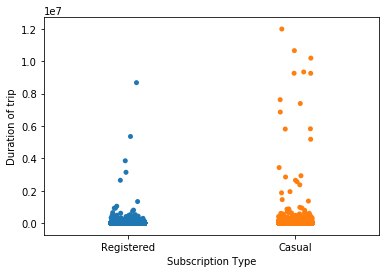

In [12]:
sns.stripplot(x='subsc_type',y='duration', data=Trips)
plt.ylabel('Duration of trip')
plt.xlabel('Subscription Type')
plt.show()

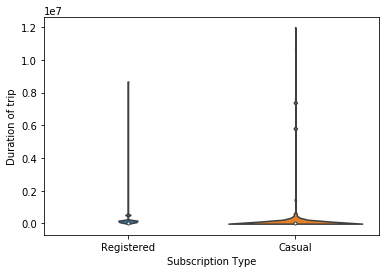

In [13]:
sns.violinplot(x='subsc_type',y='duration', data=Trips)
plt.ylabel('Duration of trip')
plt.xlabel('Subscription Type')
plt.show()

# Conclusion

With this we can conclude that Casual members tend to have (on average) longer trips than Registered members.

Registered trip mean (seconds): 733.3289835450383

Casual trip mean (seconds): 2293.4422135752234

In [14]:
Trips.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [15]:
Trips.dtypes

seq_id          int64
hubway_id       int64
status         object
duration        int64
start_date     object
strt_statn    float64
end_date       object
end_statn     float64
bike_nr        object
subsc_type     object
zip_code       object
birth_date    float64
gender         object
dtype: object

In [16]:
Trips['start_date'] = pd.to_datetime(Trips['start_date'], format='%m/%d/%Y %H:%M:%S')

In [17]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null datetime64[ns]
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 156.6+ MB


In [18]:
Trips_initial_time = Trips.set_index('start_date').resample('H').count()

In [19]:
Trips_initial_time = Trips_initial_time['duration']

In [20]:
Trips_per_hour=Trips_initial_time.groupby(Trips_initial_time.index.hour).sum()

In [21]:
Trips_per_hour

start_date
0      17826
1      14344
2      10488
3       3056
4       2201
5       7189
6      26780
7      73784
8     128053
9      79240
10     62413
11     74369
12     91815
13     92826
14     91745
15     99831
16    130762
17    176240
18    129882
19     91460
20     62231
21     47600
22     38063
23     26827
Name: duration, dtype: int64

In [22]:
Trips_per_hour.max()

176240

Text(0, 0.5, 'Trips')

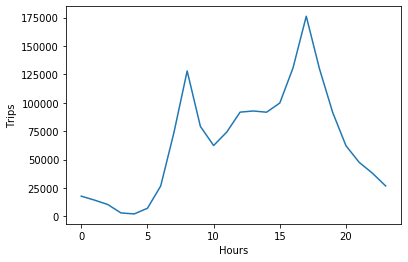

In [23]:
plt.plot(Trips_per_hour)
plt.xlabel('Hours')
plt.ylabel('Trips')

# Conclusion

This graph shows the sum of all trips each hour throughout the whole dataset.

The highest peak is at hour 17 (5 PM)

The second highest peak is at hour 8 (8 AM)

This makes sense since, judging by my own experience taking the Metro bus to college, the peak hours tend to always be early in the morning and late afternoon.

In [24]:
Trips['end_date'] = pd.to_datetime(Trips['end_date'], format='%m/%d/%Y %H:%M:%S')

In [25]:
Trips_final_day = Trips.set_index('end_date').resample('D').count()

In [26]:
Trips_final_day = Trips_final_day['duration']

In [27]:
Trips_per_days_week=Trips_final_day.groupby(Trips_final_day.index.dayofweek).sum()

In [28]:
Trips_per_days_week

end_date
0    230549
1    231785
2    238615
3    234869
4    230906
5    215591
6    196710
Name: duration, dtype: int64

In [29]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
Trips_per_days_week.index = days

In [30]:
Trips_per_days_week

Monday       230549
Tuesday      231785
Wednesday    238615
Thursday     234869
Friday       230906
Saturday     215591
Sunday       196710
Name: duration, dtype: int64

In [31]:
Trips_per_days_week[Trips_per_days_week == Trips_per_days_week.max()]

Wednesday    238615
Name: duration, dtype: int64

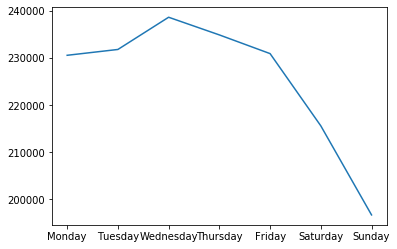

In [32]:
plt.plot(Trips_per_days_week)

# Conclusion

This graph shows the sum of the number of trips each day on the whole dataset.

The day with the most trips seems to be Wednesday.
In general, Monday through Friday tend to have the most traffic; Sunday seems to have the least traffic and Saturday is in between.

In [63]:
Trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null datetime64[ns]
strt_statn    1579011 non-null float64
end_date      1579025 non-null datetime64[ns]
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 156.6+ MB


In [79]:
Trips_by_startstation = Trips.groupby('strt_statn')
aggregator = {'duration': 'count'}

In [80]:
aggregated_startstation = Trips_by_startstation.aggregate(aggregator)

In [81]:
aggregated_startstation.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 142 entries, 3.0 to 145.0
Data columns (total 1 columns):
duration    142 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [83]:
aggregated_startstation.duration.sum()

1579011

In [97]:
aggregated_startstation.sort_values(by='duration', ascending=0)

,duration
strt_statn,
22.0,56443
36.0,42571
53.0,35440
67.0,33685
16.0,32860
42.0,32798
33.0,31077
58.0,28285
52.0,26979


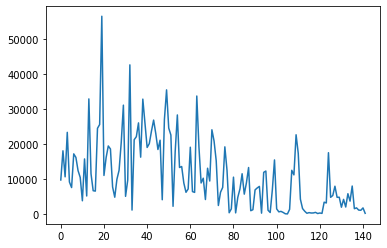

In [89]:
plt.plot(np.array(aggregated_startstation))

# Conclusion

I ignored the 14 missing values in the strt_statn column since they are statistically insignificant in comparison to the size of the dataset.

The station 22.0 seems to be the most popular having 56443 total trips counted.

The second most popular is station 36.0 having 42571 total trips.

The third one is station 53.0 with 35440 total trips taken.

These answers might not be the most accurate since im not taking into consideration the trip times/duration, only how many trips.